# Data Story

1. Questions
    - Comparisons
    - Counts
    - Trends
    - Plots (Bar/Histogram/Scatter/Time-Series)
    - Cross-tabs
2. Insights
    - Correlations
    - Hypotheses
3. Narrative
    - Present in a story form, needs to flow
    - What trends/relationships would make it more complete?

**Notes:**

- Date/Time needs to be categorized before being used in ML models
- Only choose a few columns to explore in detail, can always go back and explore further after starting ML
- *Histogram of diff in appointment-date relative to scheduled-date*

## Import clean DataFrame from 2.0-jkg-data-wrangling

In [1]:
# Package imports
import pandas as pd

# import pickle file
df_clean = pd.read_pickle('../data/interim/clean_df.pickle')


In [2]:
# Appointments DataFrame
df_appointments = df_clean.copy()

# Patients DataFrame
df_patients = df_clean.copy()

## Visualization TODOs

- Create DataFrame of Patients w/ duplicates removed (this would also help identify outliers, patients w/tons of appointments)
    - Count of Total Appointments
    - Count of No-show Appointments
- Histogram of DateDiff (overall and missed appointments)
- Crosstab of SMS_sent and noshow

In [3]:
# Calculate Date Difference (Appointment - Scheduled)

# (df_clean['Appointment_Date'] - df_clean['Scheduled_Date'])

# need to recast scheduled date as just date since appointment date does not have time included
# look for potential outliers of backdated appointments

df_appointments['Scheduled_Date_Only'] = df_appointments['Scheduled_Date'].dt.date

In [4]:
df_appointments.head()

,Patient_ID,Appointment_ID,Gender,Scheduled_Date,Appointment_Date,Age,Neighborhood,Welfare,Hypertension,Diabetes,Alcoholism,Disability,SMS_sent,No_show,Scheduled_Date_Only
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29


In [5]:
df_appointments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
Patient_ID             110527 non-null float64
Appointment_ID         110527 non-null int64
Gender                 110527 non-null object
Scheduled_Date         110527 non-null datetime64[ns]
Appointment_Date       110527 non-null datetime64[ns]
Age                    110527 non-null int64
Neighborhood           110527 non-null object
Welfare                110527 non-null int64
Hypertension           110527 non-null int64
Diabetes               110527 non-null int64
Alcoholism             110527 non-null int64
Disability             110527 non-null int64
SMS_sent               110527 non-null int64
No_show                110527 non-null object
Scheduled_Date_Only    110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(4)
memory usage: 12.6+ MB


In [6]:
df_appointments['Scheduled_Date_Only'] = pd.to_datetime(df_appointments['Scheduled_Date_Only'])

In [7]:
df_appointments['Date_Diff'] = df_appointments['Appointment_Date'] - df_appointments['Scheduled_Date_Only']

In [8]:
import matplotlib.pyplot as plt

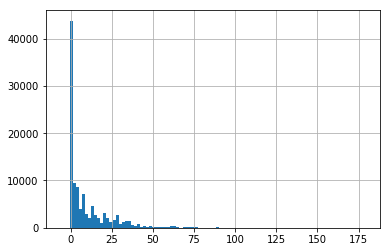

In [9]:
#plt.hist(df_appointments['Date_Diff'])

df_appointments['Date_Diff'].astype('timedelta64[D]').hist(bins=100)

plt.show()

In [10]:
df_appointments['Date_Diff'].astype('timedelta64[D]')

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
5          2.0
6          2.0
7          2.0
8          0.0
9          2.0
10         2.0
11         3.0
12         1.0
13         1.0
14         1.0
15         3.0
16         1.0
17         1.0
18         3.0
19         0.0
20         2.0
21         2.0
22         4.0
23         1.0
24         0.0
25         3.0
26         0.0
27         2.0
28         0.0
29         0.0
          ... 
110497     0.0
110498     0.0
110499     0.0
110500     0.0
110501     0.0
110502     0.0
110503     0.0
110504     0.0
110505     0.0
110506     0.0
110507     0.0
110508     0.0
110509     0.0
110510     0.0
110511     0.0
110512     0.0
110513     0.0
110514     0.0
110515     2.0
110516     1.0
110517     0.0
110518    41.0
110519    41.0
110520    35.0
110521    35.0
110522    35.0
110523    35.0
110524    41.0
110525    41.0
110526    41.0
Name: Date_Diff, Length: 110527, dtype: float64

In [11]:
#df_appointments['Date_Diff'].value_counts().sort_index()

date_diff = df_appointments['Date_Diff'].astype('timedelta64[D]')

date_diff_gt_one = date_diff.loc[date_diff > 0]

In [12]:
date_diff_gt_one.value_counts().sort_index()

1.0      5213
2.0      6725
3.0      2737
4.0      5290
5.0      3277
6.0      4037
7.0      4906
8.0      2332
9.0      1605
10.0     1391
11.0      987
12.0     1115
13.0     1682
14.0     2913
15.0     1503
16.0     1151
17.0     1107
18.0     1021
19.0     1044
20.0     1187
21.0     1861
22.0     1173
23.0      822
24.0      622
25.0      637
26.0      731
27.0     1013
28.0     1706
29.0     1089
30.0      704
         ... 
101.0       1
102.0       4
103.0       5
104.0       8
105.0       4
107.0       2
108.0       5
109.0       5
110.0       2
111.0       5
112.0       5
115.0       2
117.0       1
119.0       4
122.0       3
123.0       1
125.0       1
126.0       1
127.0       1
132.0       1
133.0      11
139.0       1
142.0       8
146.0       1
151.0       1
155.0      10
162.0      11
169.0       8
176.0      16
179.0      10
Name: Date_Diff, Length: 128, dtype: int64

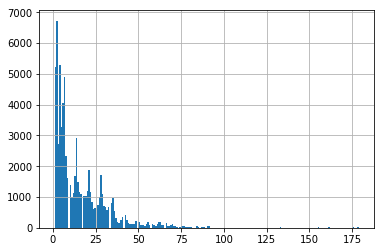

In [13]:
plt.clf()

date_diff_gt_one.hist(bins=200)

plt.show()

In [14]:
# create two dataframes, one with no-show=yes and one with no-show=no, count then merge
#df_clean

#df_patients[['Patient_ID', 'No'

In [15]:
df_patients_no_show = df_patients.loc[df_patients['No_show'] == 'Yes'].groupby('Patient_ID').count()
#df_patients[['Patient_ID', 'No_show']].loc[:, df_patients['No_show'] == True]

df_patients_total_appointments = df_patients.groupby('Patient_ID').count()

df_patients_no_show['no_show_count'] = df_patients_no_show['No_show']

df_patients_total_appointments['total_appointments'] = df_patients_total_appointments['No_show']

df_patients_appointment_counts = df_patients_total_appointments.merge(df_patients_no_show, how='left', left_index=True, right_index=True)

In [16]:
df_patients_appointment_counts = df_patients_appointment_counts[['no_show_count', 'total_appointments']].fillna(0)

In [17]:
df_patients_appointment_counts.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 62299 entries, 39217.84439 to 999981631772427.0
Data columns (total 2 columns):
no_show_count         62299 non-null float64
total_appointments    62299 non-null int64
dtypes: float64(1), int64(1)
memory usage: 3.9 MB


In [18]:
df_patients_appointment_counts['no_show_count'] = df_patients_appointment_counts['no_show_count'].astype('int64')

In [19]:
df_patients_appointment_counts['no_show_pct'] = df_patients_appointment_counts['no_show_count'] / df_patients_appointment_counts['total_appointments']

In [20]:
df_patients_appointment_counts

,no_show_count,total_appointments,no_show_pct
Patient_ID,,,
3.921784e+04,0,1,0.000000
4.374176e+04,0,1,0.000000
9.377953e+04,0,1,0.000000
1.417242e+05,0,1,0.000000
5.376153e+05,0,1,0.000000
5.628261e+06,1,1,1.000000
1.183186e+07,0,1,0.000000
2.263866e+07,0,2,0.000000
5.216894e+07,0,2,0.000000
